# Random Forest Model
##### Authors: Diego Senso González, Luis Vaciero
##### 4 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance

## Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from math import sqrt
import itertools
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.datasets import make_classification
import random
random.seed(1234)
from sklearn.impute import KNNImputer
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## READING THE DATA

### We import the cleaned dataset 

In [3]:
loan = pd.read_csv("../notebooks/loan_lasso.csv", delimiter = ',')

### We see the shape of the Dataframe

In [4]:
print('The shape of our features is:', loan.shape)

The shape of our features is: (462225, 25)


### When generating the new Cleaned Dataset a new column was created, as a new index, so we drop it.

In [6]:
loan = loan.drop(loan.columns[[0]], axis='columns')

# Random Forest

Classification with Random Forests involves the random construction of a large number of decision trees on the same set of data, and the final classification decision is made by calculating the vote of most of the predictions offered by each of the trees that make up the forest.

### We separate our dummy variable from the rest of the dataset, in order to start predicting our model.

In [19]:
# endógena

endogena = ['loan_status'] 

# exógenas

exogenas = list(set(list(loan.columns))-set(endogena))

X = loan[exogenas].values

Y = loan[endogena].values

### We split the dataset into two parts, train and test

We also apply Smote to balance the new dataset. Smote function creates synthetic samples of the minority class making the minority class equal to the majority class.

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(387126, 23)
(92445, 23)


### We convert the variables depending if they are Numeric or Categorical

In [9]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Apply the transformations to the correct columns in the dataframe 

In [10]:
numeric_features = loan.select_dtypes(include=['int64', 'float64']).columns
categorical_features = loan.select_dtypes(include=['object']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Next step is to create a pipeline that combines the preprocessor created above with a classifier

In [11]:
rf = Pipeline(steps=[('classifier', RandomForestClassifier())])

### Fit method on the raw data and the preprocessing steps will be applied followed by training the classifier.

In [12]:
rf.fit(X_train, Y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

### Predict method and the preprocessing steps will be applied followed by the prediction.

In [13]:
y_pred = rf.predict(X_test)

### Classifiers applying the transformations and training the model. (KNeighborsClassifier, DecisionTreeClassifier & RandomForestClassifier)

In [14]:
%%time

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier()]

for classifier in classifiers:
    pipe = Pipeline([('classifier', classifier)])
    pipe.fit(X_train, Y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, Y_test))

KNeighborsClassifier(n_neighbors=3)
model score: 0.670
DecisionTreeClassifier()
model score: 0.645
RandomForestClassifier()
model score: 0.731
AdaBoostClassifier()
model score: 0.749
Wall time: 3min 7s


### ROC Curve

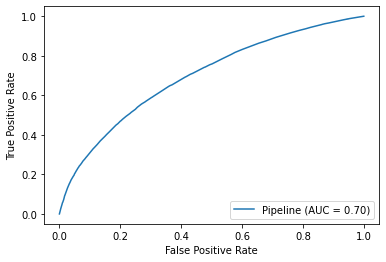

Random Forest score train:  0.7420710569685323
Random Forest score:  0.7487479041592298


In [21]:
metrics.plot_roc_curve(pipe, X_test, Y_test)
plt.show() 
print("Random Forest score train: ", pipe.score(X_train, Y_train))
print("Random Forest score: ", pipe.score(X_test, Y_test))

# Another way to do the Random Forest Model

In [22]:
%%time
param_test1 = {
    'max_depth' : [4,8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
 }
gsearch_RandomForest = GridSearchCV(estimator = RandomForestClassifier(500), 
                               param_grid = param_test1, scoring='roc_auc',n_jobs=-1, iid=False, cv=5)
gsearch_RandomForest.fit(X_train, Y_train)

C:\Users\Luis\anaconda4\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Wall time: 58min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [23]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=500),
             iid=False, n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='roc_auc')

In [24]:
gsearch_RandomForest.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [25]:
gsearch_RandomForest.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=500)

In [26]:
%%time
gsearch_RandomForest2 = gsearch_RandomForest.best_estimator_
gsearch_RandomForest2.fit(X_train, Y_train)

Wall time: 2min 28s


RandomForestClassifier(max_depth=8, n_estimators=500)

In [27]:
Y_pred_gsearch_RandomForest2 = gsearch_RandomForest2.predict(X_test)

In [29]:
print(confusion_matrix(Y_test,Y_pred_gsearch_RandomForest2))
print(classification_report(Y_test,Y_pred_gsearch_RandomForest2))

[[  808 22684]
 [  549 68404]]
              precision    recall  f1-score   support

         0.0       0.60      0.03      0.07     23492
         1.0       0.75      0.99      0.85     68953

    accuracy                           0.75     92445
   macro avg       0.67      0.51      0.46     92445
weighted avg       0.71      0.75      0.65     92445



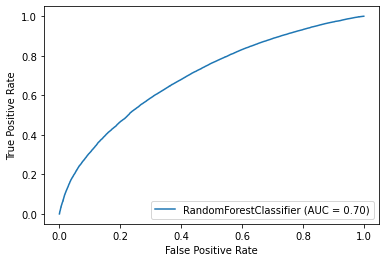

Random Forest score train:  0.7455505442672412
Random Forest score:  0.7486830007031208


In [30]:
metrics.plot_roc_curve(gsearch_RandomForest2, X_test, Y_test)
plt.show() 
print("Random Forest score train: ", gsearch_RandomForest2.score(X_train, Y_train))
print("Random Forest score: ", gsearch_RandomForest2.score(X_test, Y_test))

# Saving the model

In [17]:
#We import pickle to save the model and use it later with new data
import pickle
filename = 'randomforest.sav'
pickle.dump(pipe, open (filename, 'wb'))
model_randomforest = pickle.load(open('randomforest.sav', 'rb'))
model_randomforest

Pipeline(steps=[('classifier', AdaBoostClassifier())])

# Loading the model

In [18]:
#Load model and obtain accuracy for new dataset
model = pickle.load(open('randomforest.sav', 'rb'))
result = model_randomforest.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result * 100.0))

Accuracy: 74.87%
